# Hello Everyone Welcome.
In this blog i have done analysis of the googleplaystore dataset

**First of all let's get import libraries which we need**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**Second Part we must load dataset and summarize it to learn dataset. And then we can see dataset need to clean we must clean the dataset**
You can ask me **Why have you written the functions in one Cell?** Answer is one: When I separated these functions my clean_dataset function was not working.

In [2]:
def load_dataset():
    data = pd.read_csv("./archive/googleplaystore.csv")
    return data
data = load_dataset()
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
def print_summarize_dataset(dataset):
    print(dataset.shape)
    print(dataset.head(10))
    print(dataset.describe())
summarize = print_summarize_dataset(data)
summarize

(10841, 13)
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                         Paper flowers instructions  ART_AND_DESIGN     4.4   
6            Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
7                                   Infinite Painter  ART_AND_DESIGN     4.1   
8                               Garden Coloring Book  ART_AND_DESIGN     4.4   
9                      Kids Paint Free - Drawing Fun  ART_AND_DESIGN     4.7   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       E

In [4]:
def clean_dataset(dataset):
    dataset.dropna(axis = 0, inplace = True)
    dataset["Reviews"] = dataset["Reviews"].astype(int)
    dataset_size = dataset[dataset["Size"].str.contains("k", regex = False)]
    dataset_size["Size"] = dataset_size["Size"].str.replace("k", "").astype(float)/1000
    data["Size"].update(dataset_size["Size"])
    dataset["Size"] = dataset["Size"].str.replace("Varies with device", "NaN").str.replace("M", "").astype(float)
    dataset["Installs"] = dataset["Installs"].str.replace("+", "").str.replace(",", "").astype(int)
    dataset["Price"] = dataset["Price"].str.replace("$", "").astype(float)
    dataset["Content Rating"] = dataset["Content Rating"].str.replace("Everyone +10", "Everyone").str.replace("+", "")
    dataset["Last Updated"] = pd.to_datetime(dataset["Last Updated"])
    dataset["Current Ver"] = dataset["Current Ver"].str.replace("Varies with device", "NaN")
    return dataset
cleaned_data = clean_dataset(data)
cleaned_data


C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_22248/3140357369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_size["Size"] = dataset_size["Size"].str.replace("k", "").astype(float)/1000
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_22248/3140357369.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset["Installs"] = dataset["Installs"].str.replace("+", "").str.replace(",", "").astype(int)
C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_22248/3140357369.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single ch

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,NaN,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000,Free,0.0,Mature 17,Books & Reference,2015-01-19,NaN,Varies with device


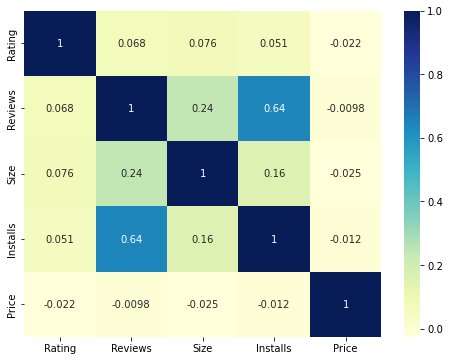

In [5]:
def compute_corelations_matrice(dataset):
    data = dataset.drop(["App","Category","Type","Content Rating","Genres","Current Ver","Android Ver"],axis=1)
    dt_cor = data.corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(dt_cor,annot=True,cmap="YlGnBu")
    
compute_corelations_matrice(data)

**Plot with bar diagram the most populars paid apps of Family category**

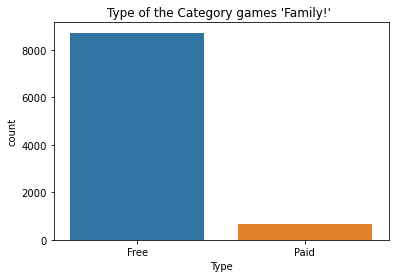

In [6]:
def plot_bar():
  sns.countplot(x=cleaned_data["Type"])
  plt.title("Type of the Category games 'Family!' ")
  plt.show()
bar = plot_bar()
bar

**Let's Plot with a pie diagram the most popular genres according to the number of installations from paid family**

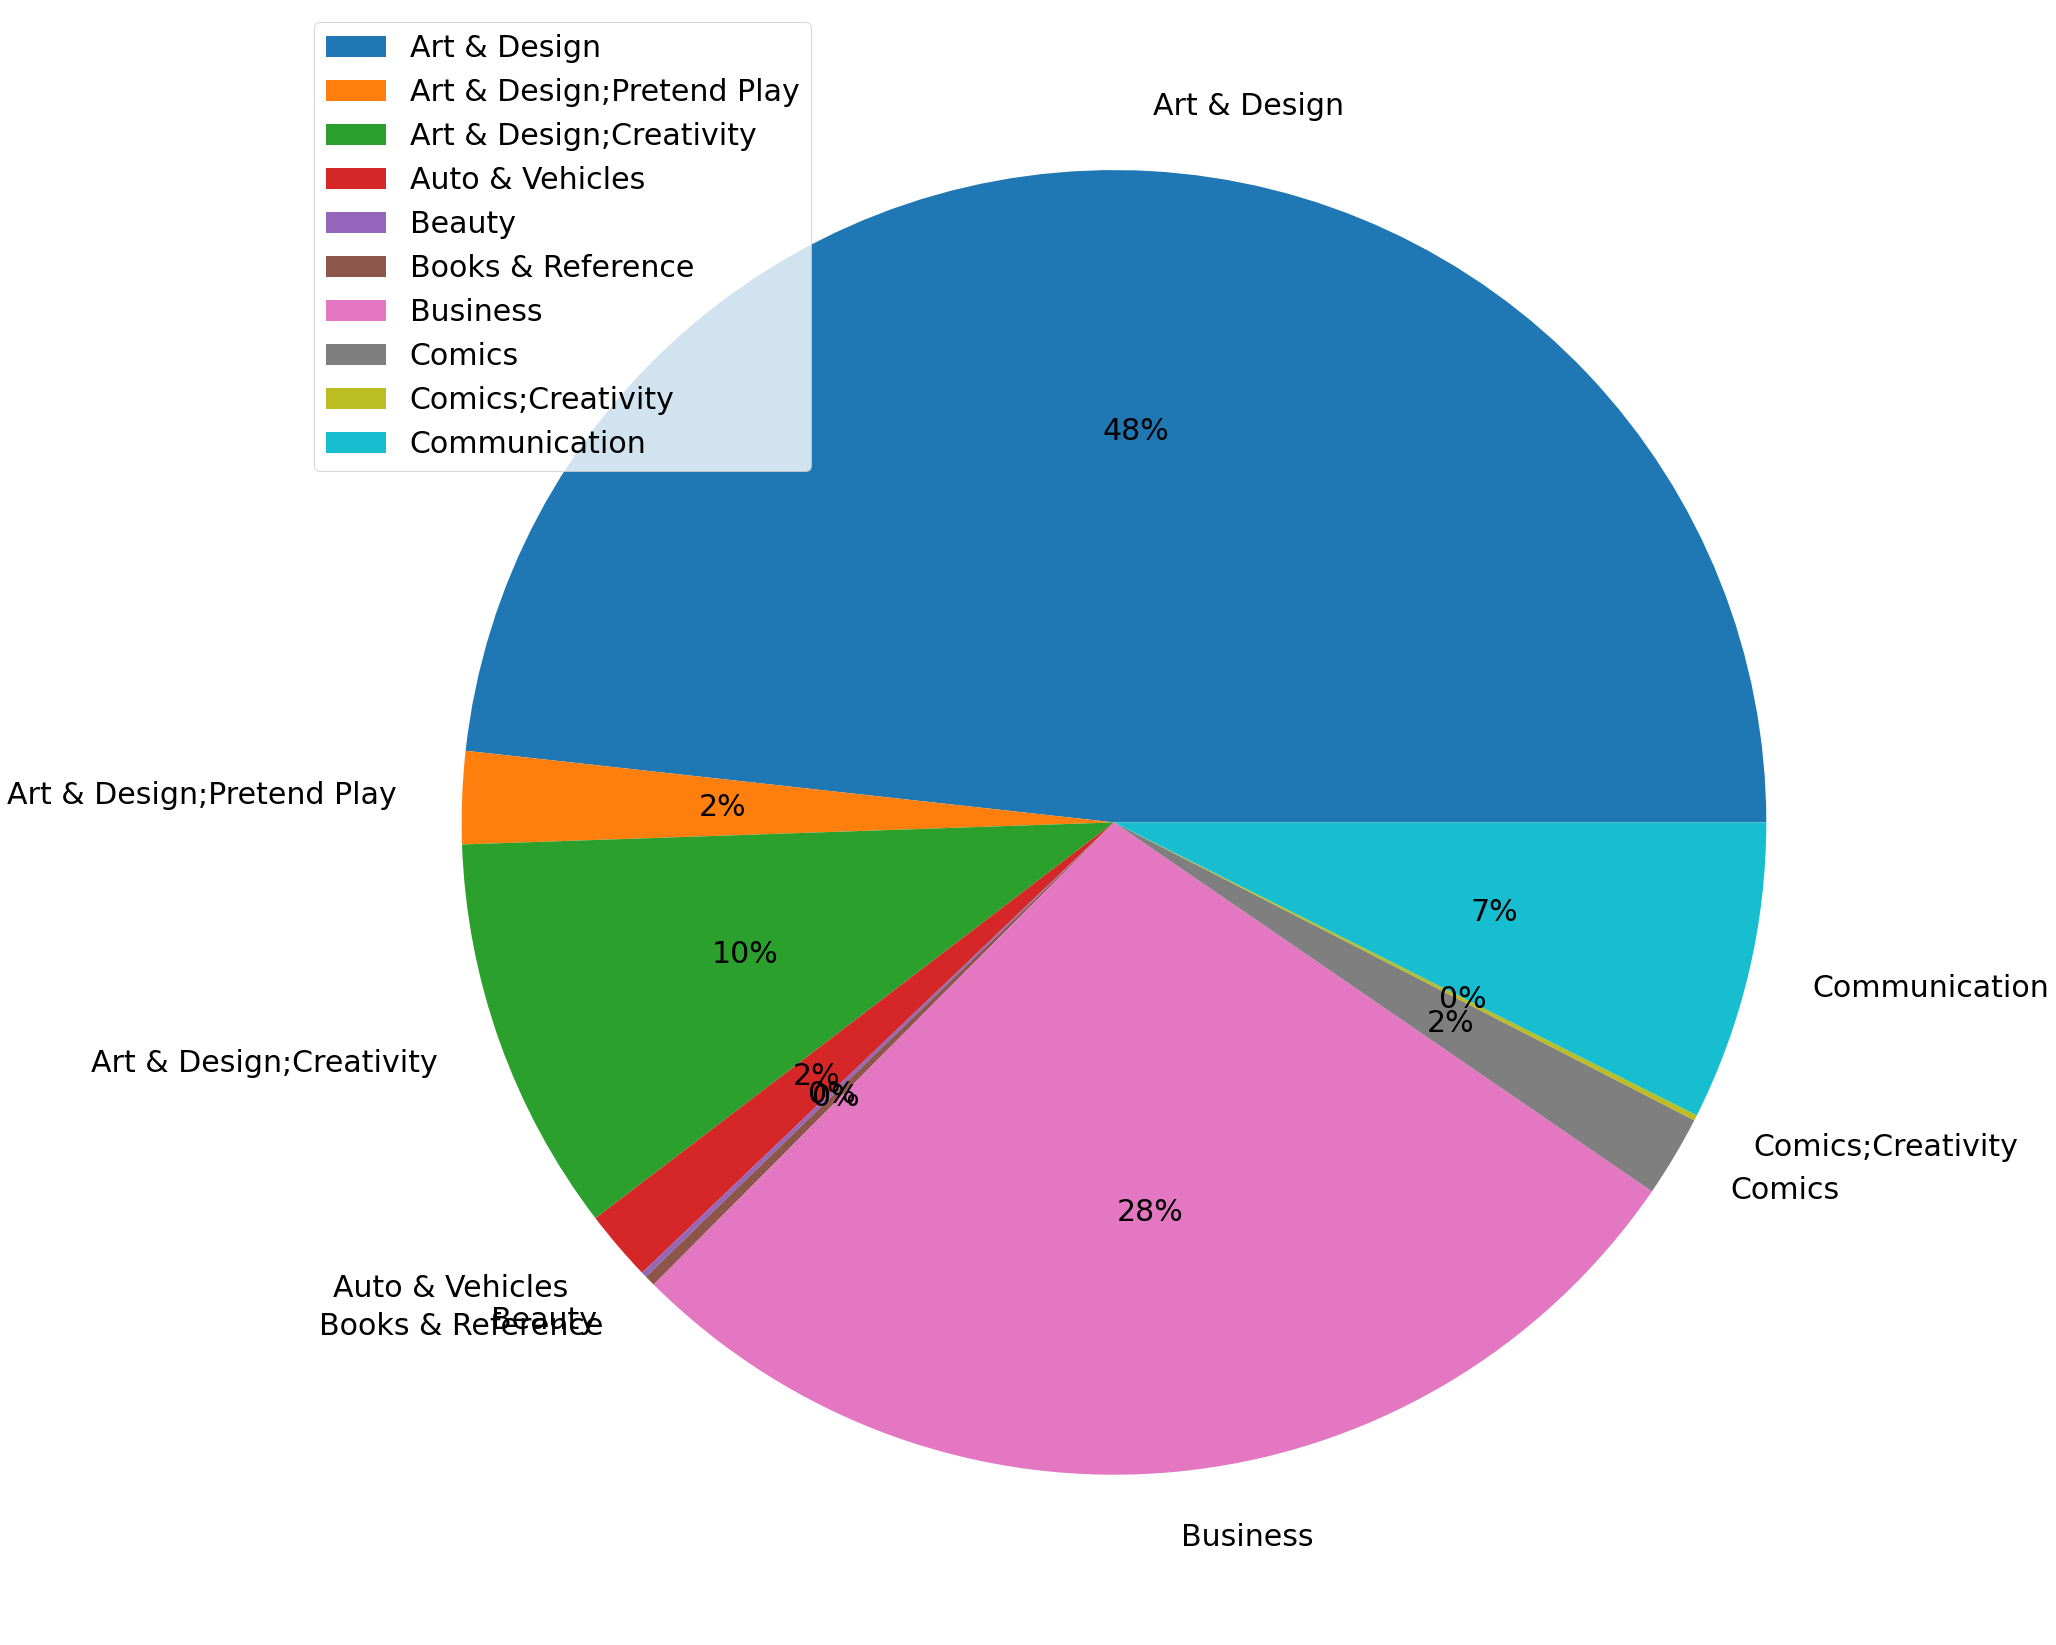

In [7]:
def most_popular_genres_from_paid_family():
  plt.figure(figsize=(50, 30))
  data = cleaned_data.groupby("Genres").count()
  k = data["Installs"].head(10)
  label = cleaned_data["Genres"].unique()
  labe = [i for i in label]
  labels = labe[0:10]
  textprops = {"fontsize":30}
  plt.pie(k, labels=labels, autopct='%.0f%%', textprops=textprops)
  plt.legend(prop = {'size' : 30}, loc = 'upper left')
  plt.show()
popular = most_popular_genres_from_paid_family()
popular

**An array with the number of installation per category**

In [8]:
def number_of_installition_per_category():
  s = cleaned_data[(cleaned_data["Category"] == "FAMILY")]
  return s["Installs"].values
number_of_installs = number_of_installition_per_category()
number_of_installs

array([ 50000000,  10000000, 100000000, ...,       500,      5000,
             100])

**Plot a pie with the number of installation per category**

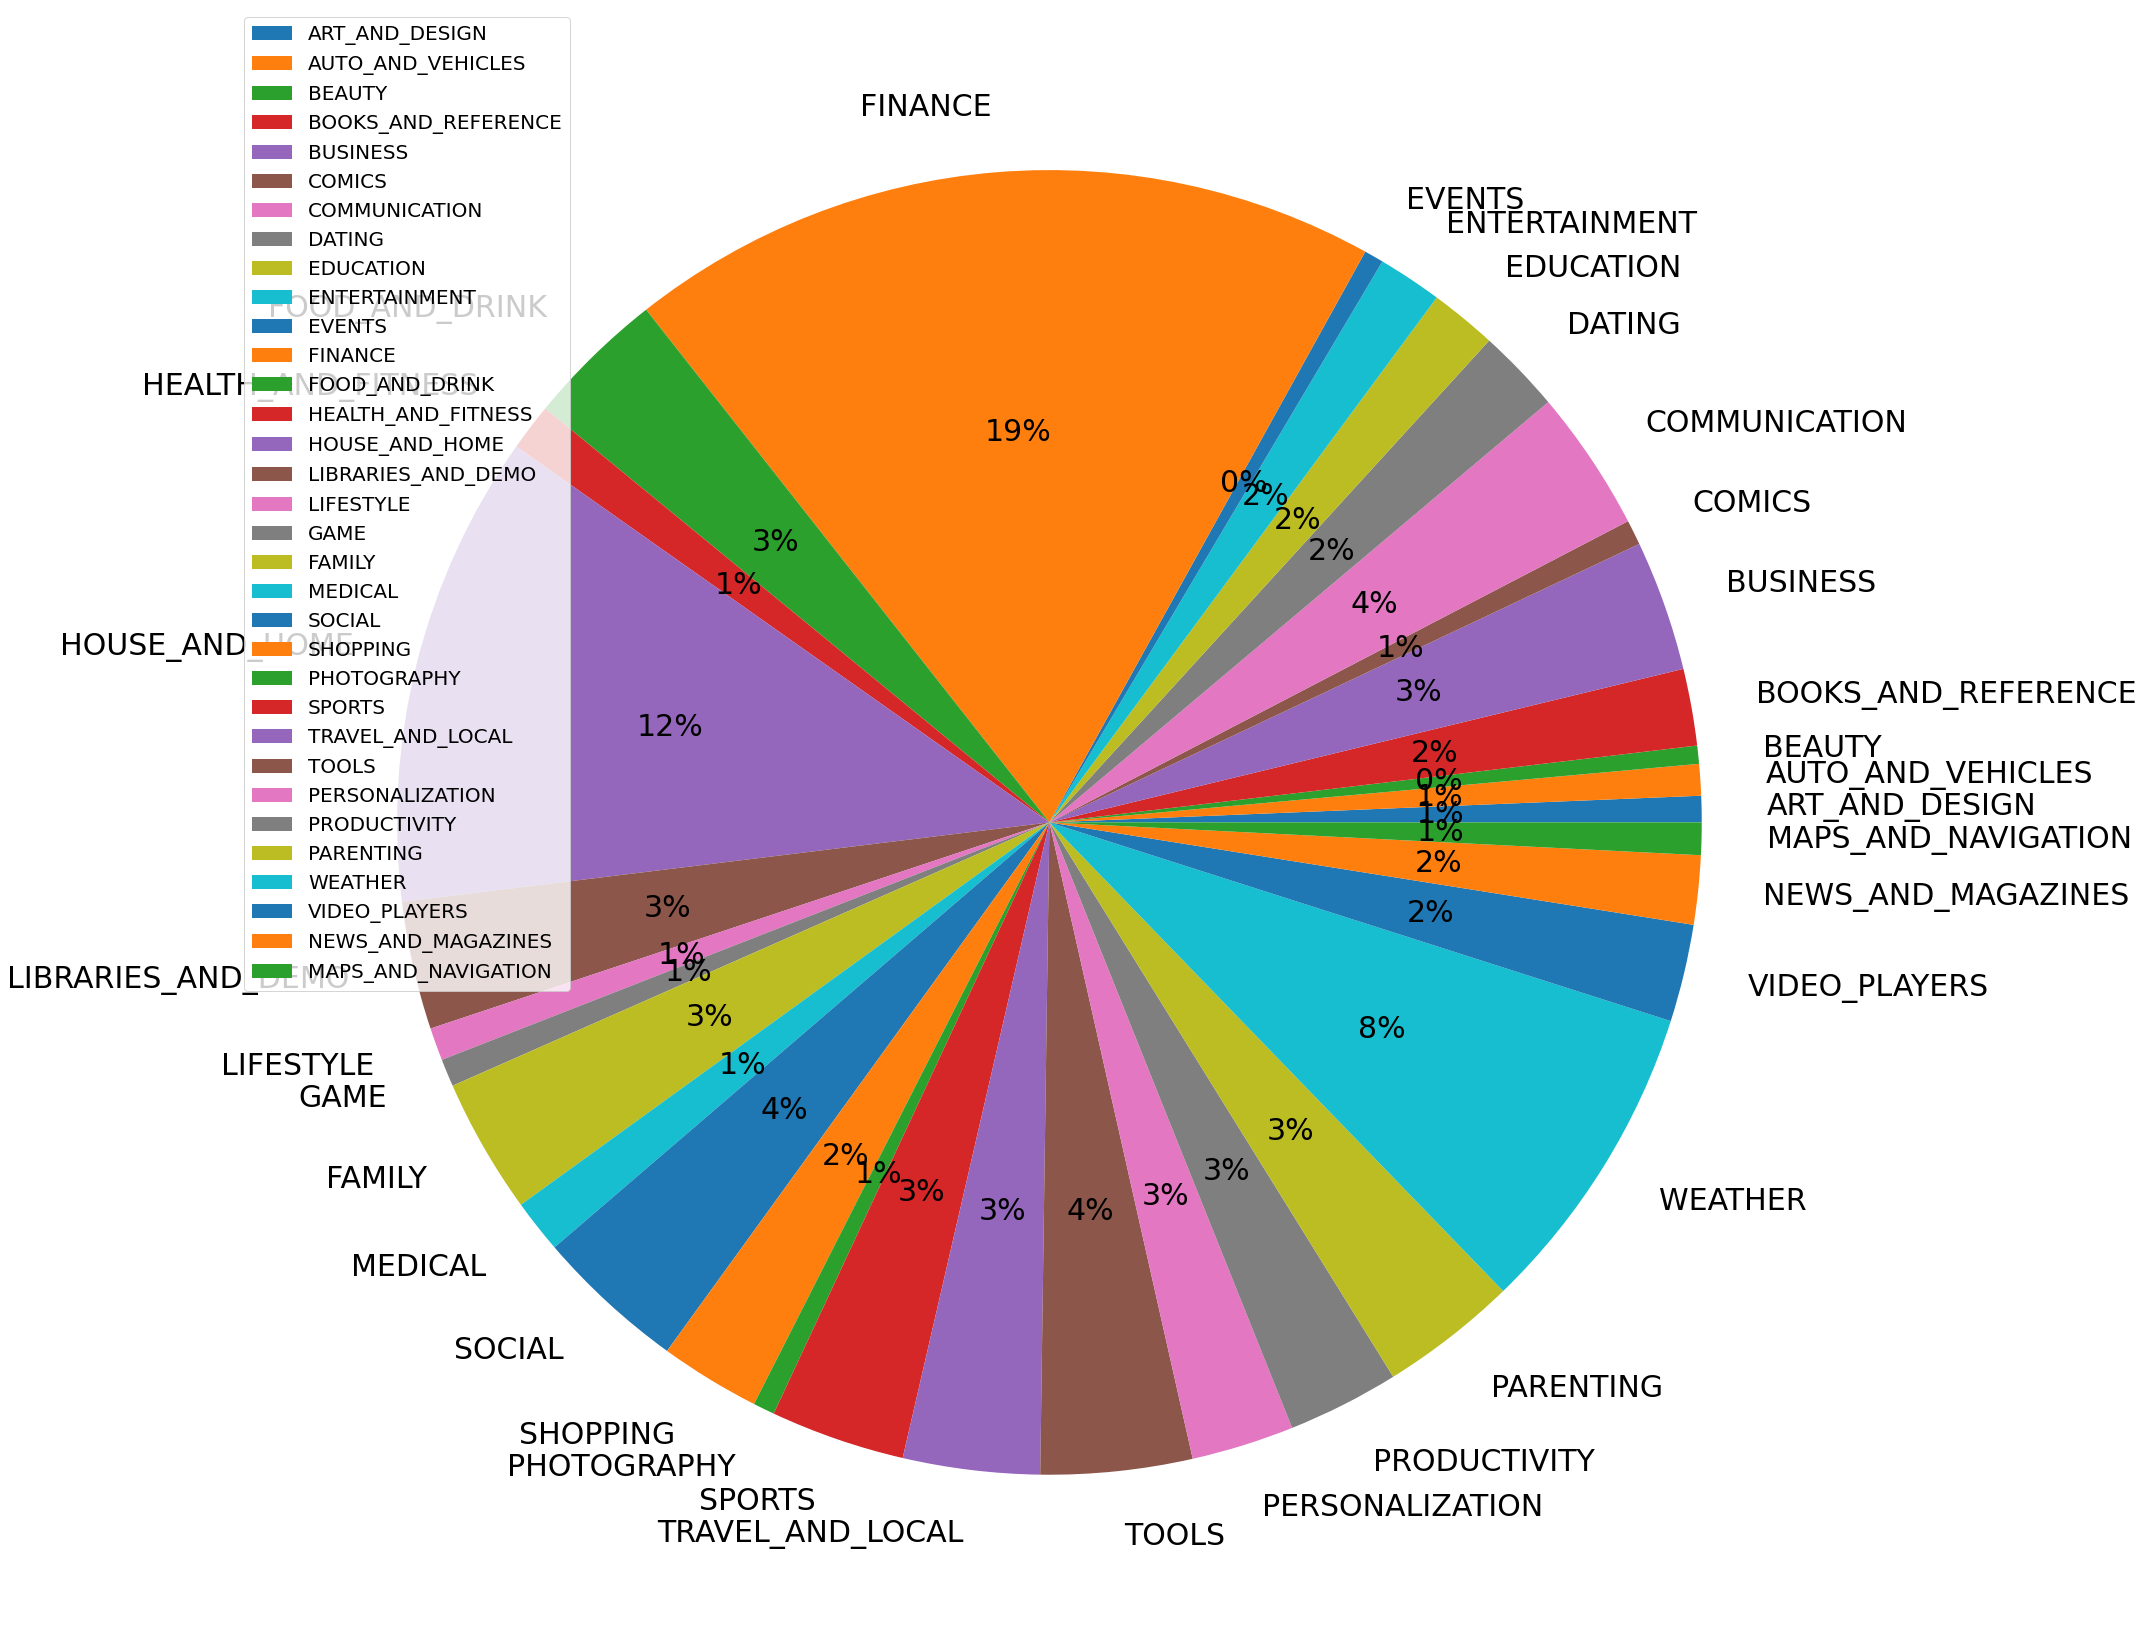

In [9]:
def plot_per_category():
  plt.figure(figsize=(50, 30))
  labels = cleaned_data["Category"].unique()
  data = cleaned_data.groupby("Category").count()
  k = data["Installs"]
  textprops = {"fontsize":30}
  plt.pie(k, labels=labels, autopct='%.0f%%', textprops =textprops)
  plt.legend(prop = {'size' : 20}, loc = 'upper left')
  plt.show()
pie_plot_installs = plot_per_category()
pie_plot_installs

**Plot a bar with the mean price per category**

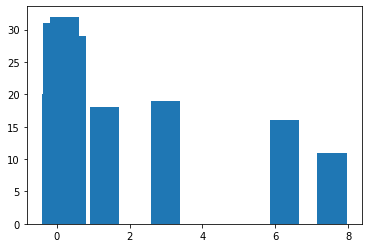

In [10]:
def plot_bar_mean_price():
  category = cleaned_data["Category"].unique()
  for_for = [np.mean(cleaned_data[cleaned_data["Category"] == i]["Price"].values) for i in category]
  plt.bar(for_for, np.arange(len(for_for)))
  plt.show()
plot_bar = plot_bar_mean_price()
plot_bar

**Most expensive apps per category**

C:\Users\LENOVO~1\AppData\Local\Temp/ipykernel_22248/4080284230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_apps["total_earn"] = total_earn


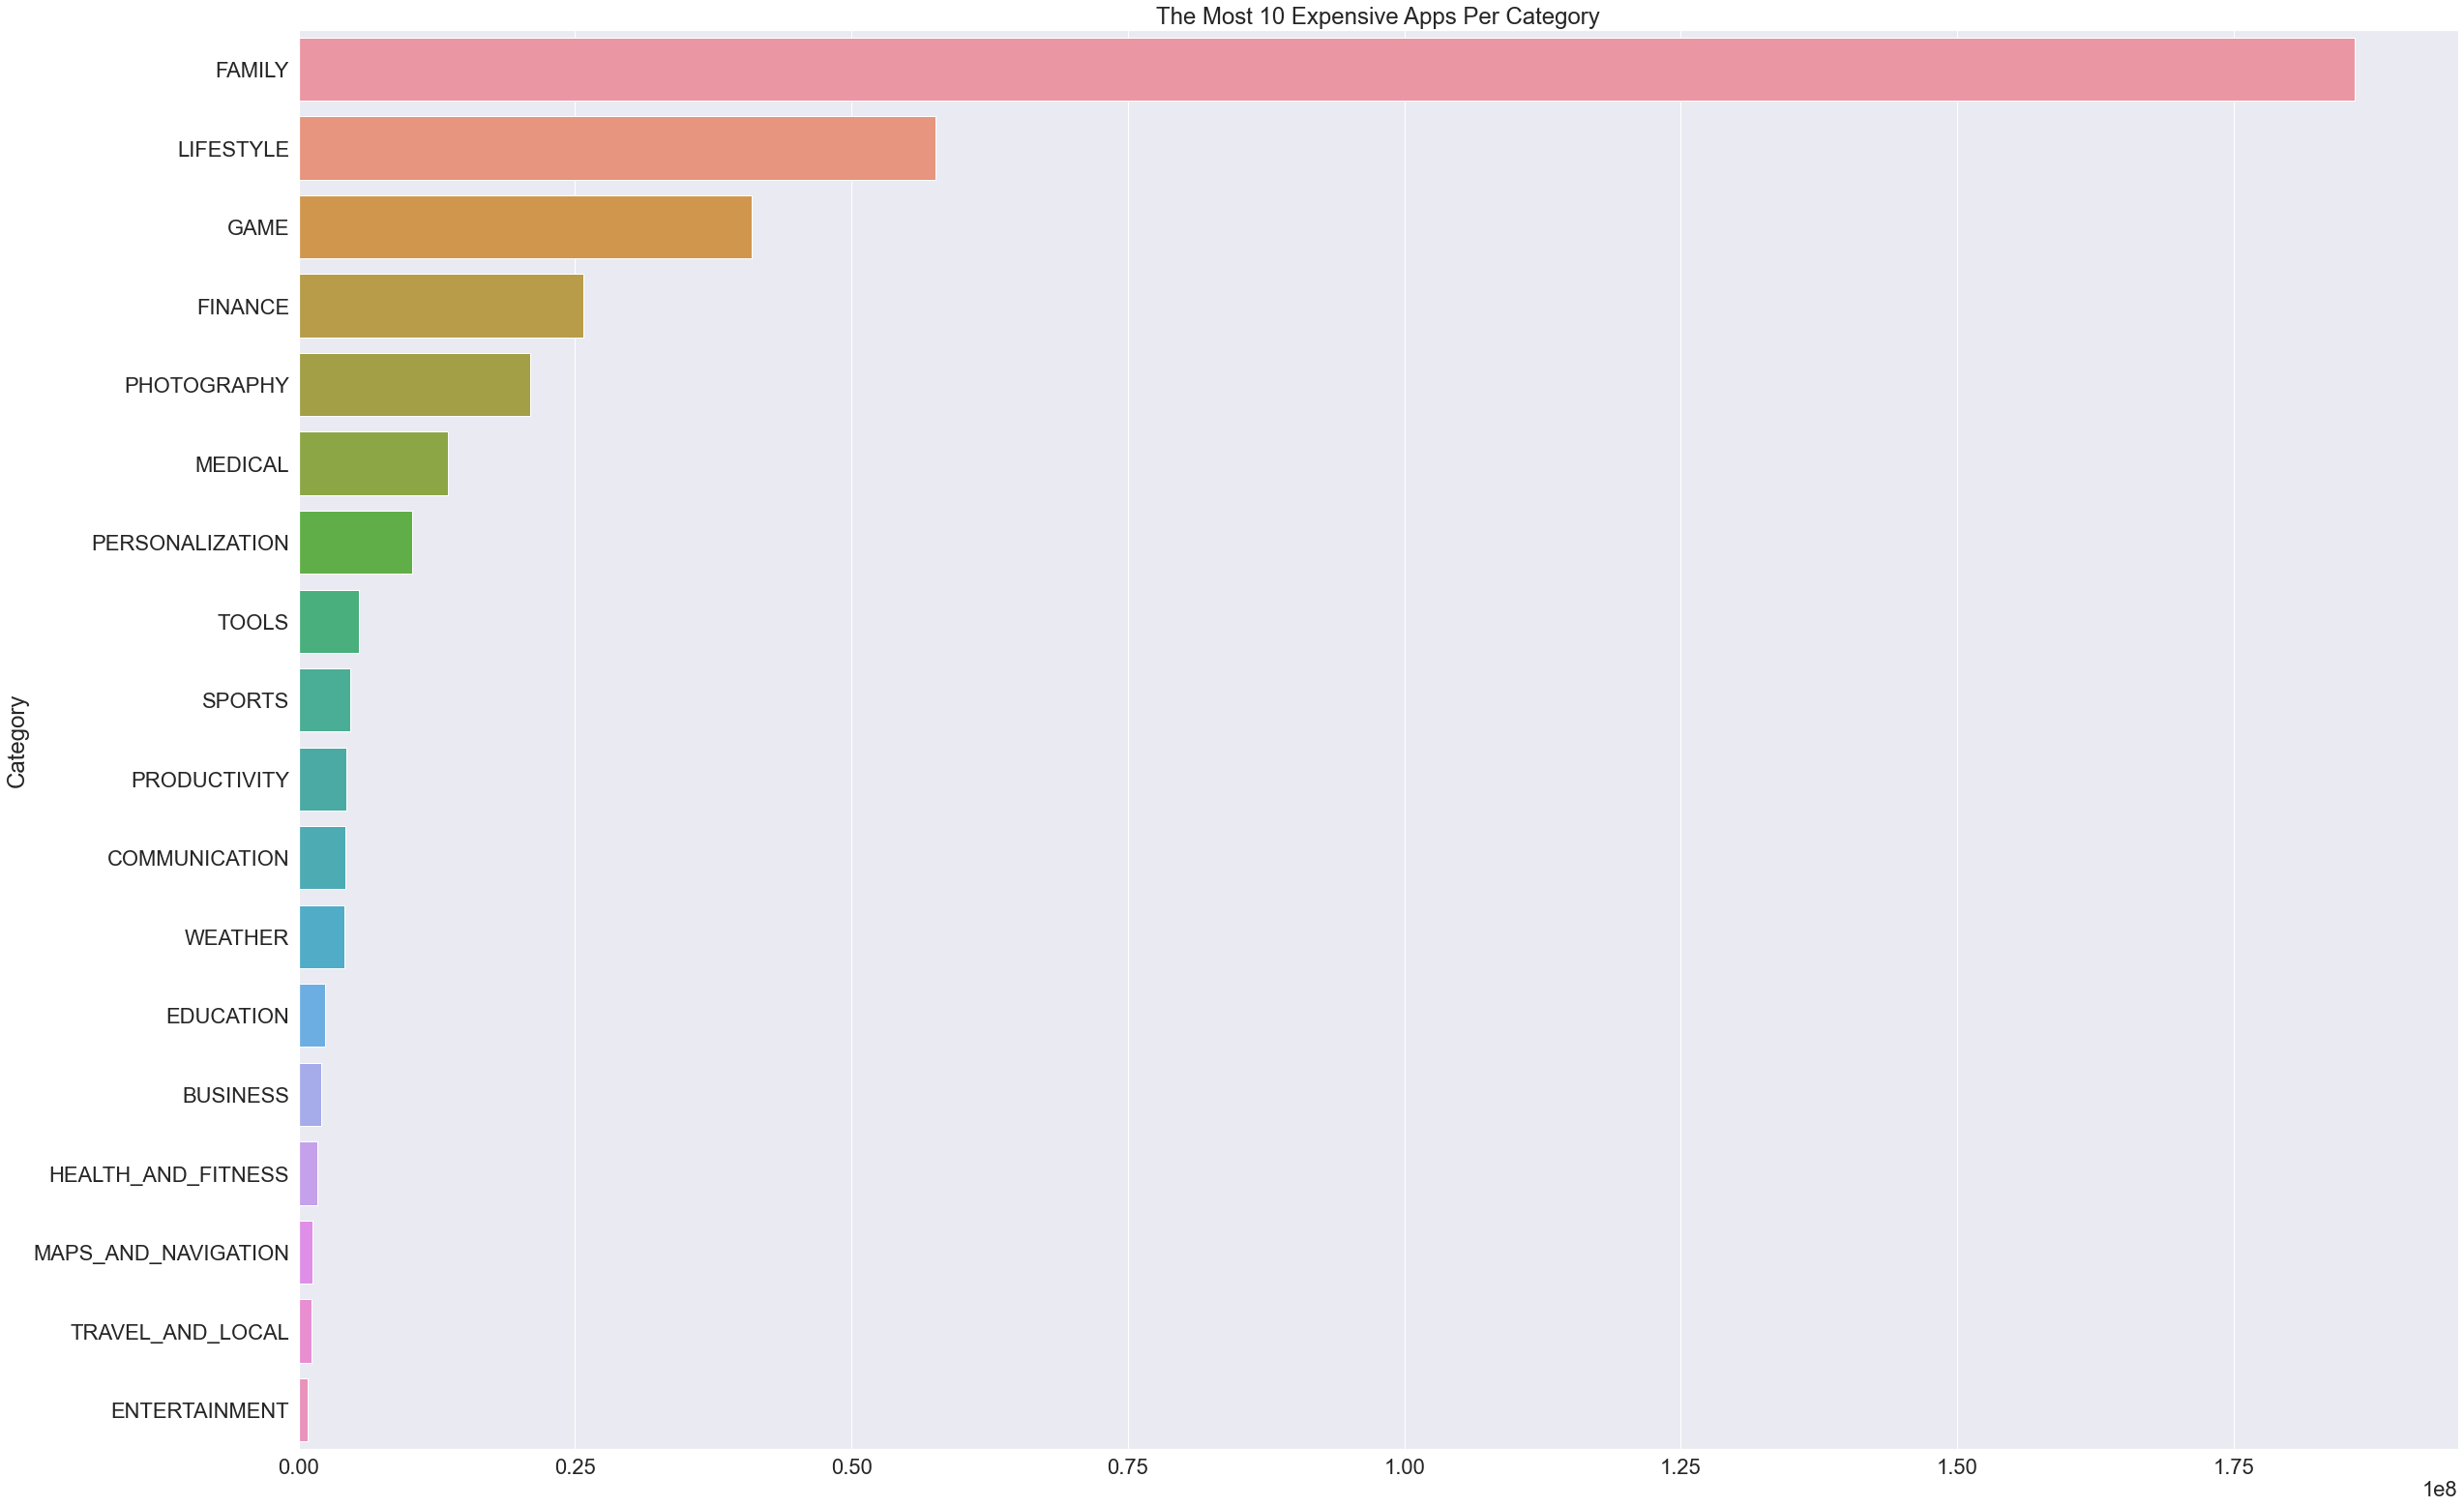

In [11]:
def most_expensive_apps():
  plt.figure(figsize=(40, 27))
  free_apps = cleaned_data[(cleaned_data["Type"] == "Free")]
  paid_apps = cleaned_data[(cleaned_data["Type"] == "Paid")]
  total_earn = paid_apps["Price"] * paid_apps["Installs"]
  paid_apps["total_earn"] = total_earn
  sns.set(font_scale=2)
  all_sums = paid_apps.groupby("Category").sum().total_earn.sort_values()
  sns.barplot(x = all_sums.values[10:][::-1], y = all_sums.index[10:][::-1]).set(title='The Most 10 Expensive Apps Per Category')
  plt.show()
expensive_apps = most_expensive_apps()
expensive_apps